In [7]:
import numpy as np
import matplotlib.pyplot as plt
from energy_spectrum import compute_scalar_energy_spectrum, compute_energy_spectrum # type: ignore

### 1D

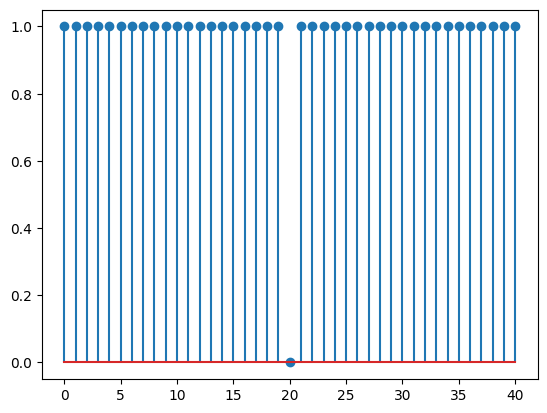

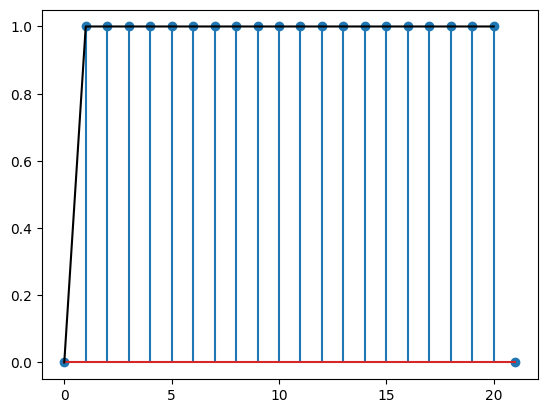

In [7]:
N = 20
EK_U = [1] * N
EK_U = np.array(EK_U[::-1] + [0] + EK_U)
plt.stem(EK_U)

k, Ek = compute_scalar_energy_spectrum(
    EK_U=EK_U, debug=False
)
plt.figure()
plt.stem(Ek)
plt.plot(EK_U[(len(EK_U)-1)//2:], 'k')

21


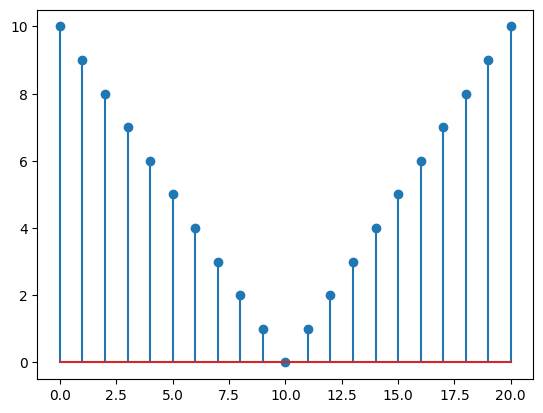

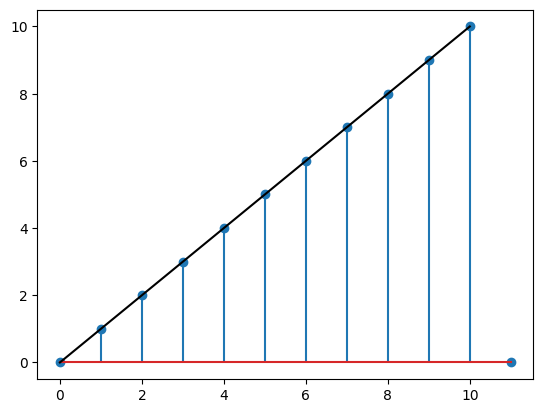

In [8]:
N = 10
EK_U = list(np.arange(N)+1)
EK_U = EK_U[::-1] + [0] + EK_U
EK_U = np.array(EK_U)
print(len(EK_U))
plt.stem(EK_U)

k, Ek = compute_scalar_energy_spectrum(EK_U)
plt.figure()
plt.stem(Ek)
plt.plot(EK_U[(len(EK_U)-1)//2:], 'k')

### 2D

(-0.5, 4.5, 4.5, -0.5)

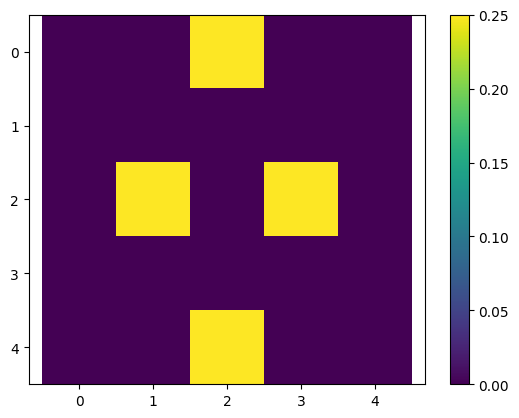

In [7]:
sr = 5
x = y = np.arange(0, 1., 1. / sr)
X, Y = np.meshgrid(x, y)
u = np.sin(2 * np.pi * X) + np.sin(2* np.pi * 2 * Y)
U0 = 1

# When
EK_U, EK_V, EK_W, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=u, w=None, U0=U0, debug=True
    )
plt.imshow(EK_U)
plt.colorbar()
plt.axis('equal')

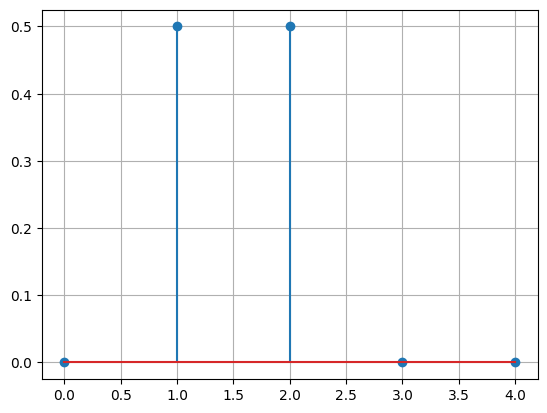

In [9]:
k, Ek = compute_scalar_energy_spectrum(EK_U, EK_V)
plt.stem(Ek)
plt.grid()

In [ ]:
def mirror_data(q1):
    q2 = np.fliplr(q1)
    q3 = np.flipud(q1)
    q4 = np.flipud(q2)
    Q = np.vstack((np.hstack((q1, q2)), np.hstack((q3, q4))))
    return Q

In [ ]:
# Create data for first quadrant
EK_U = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
plt.imshow(EK_U)
plt.colorbar()
plt.axis('equal')

In [ ]:
k, Ek, EK_U_sphere, EK_V_sphere, EK_W_sphere =\
    compute_scalar_energy_spectrum(EK_U, EK_U, debug=True)
print(len(k))

In [ ]:
plt.plot(k, Ek)
plt.stem(EK_U_sphere)

In [ ]:
# Create meshgrid of 10X10 points
x = y = np.arange(-1, 1., 1. / 50)
X, Y = np.meshgrid(x, y)

# Create a circle
r = 0.5
u = np.sqrt((X)**2 + (Y )**2) < r
plt.imshow(u)

In [ ]:
k, Ek, EK_U_sphere, EK_V_sphere, EK_W_sphere =\
    compute_scalar_energy_spectrum(u, u, debug=True)

In [ ]:
plt.plot(k, Ek)
plt.stem(EK_U_sphere)

### 3D

In [ ]:
EK_U = np.array([
    [
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ],
    [
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ],
    [
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ]
])
k, Ek, EK_U_sphere, EK_V_sphere, EK_W_sphere =\
    compute_scalar_energy_spectrum(EK_U, EK_U, EK_U, debug=True)
print(len(k))

In [ ]:
plt.plot(EK_U_sphere)
plt.stem(EK_U_sphere)
plt.grid()
np.round(EK_U_sphere)

### Scipy vs Numpy FFTm

In [ ]:
from numpy.fft import fftn as fftn_numpy
from scipy.fft import fftn as fftn_scipy
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
# Sampling rate
sr = 5000

# Time vector
t = np.arange(0, 1., 1. / sr)

# Signal
f = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
x = np.zeros(len(t))
for i in range(len(f)):
    x += a[i] * np.sin(2 * np.pi * f[i] * t)

# FFT - Numpy
X_numpy = fftn_numpy(x)
X_numpy = np.abs(X_numpy)

# FFT - Scipy
X_scipy = fftn_scipy(x)
X_scipy = np.abs(X_scipy)

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.subplot(132)
plt.loglog(X_numpy, 'r', label='Numpy')
plt.loglog(X_scipy, 'b', label='Scipy')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT')
plt.legend()
plt.subplot(133)
# Plot error
plt.loglog(np.abs(X_numpy - X_scipy), 'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Error')

plt.tight_layout()
plt.axis('equal')

In [ ]:
# Plot Computation Time of numpy and scipy fftn
N_run = 10
t_numpy = []
t_scipy = []
N_array = np.arange(10, 15) #np.arange(10, 25)
N_array = 2**N_array
for n, N in enumerate(N_array):
    if n % 5 == 0:
        print(n)
    x0 = np.random.rand(N)
    t0 = time.time()
    for i in range(N_run):
        X_numpy = fftn_numpy(x0)
    t1 = time.time()
    t_numpy.append((t1 - t0) / 10)

    t0 = time.time()
    for i in range(N_run):
        X_scipy = fftn_scipy(x0, workers=64)
    t1 = time.time()
    t_scipy.append((t1 - t0) / 10)

In [ ]:
# Plot log-log plots
fig, ax = plt.subplots()
ax.semilogx(N_array, t_scipy, 'bo--', label='Scipy')
ax.semilogx(N_array, t_numpy, 'ro--', label='Numpy')
ax.set_xlabel('N')
ax.set_ylabel('Time (s)')
ax.set_title('Computation Time')
ax.legend()
plt.tight_layout()

# Plot speedup in secondary y-axis
speedup = np.array(t_scipy) / np.array(t_numpy)
speedup = np.abs(speedup)
ax2 = ax.twinx()
ax2.plot(N_array, speedup, 'k')
ax2.set_ylabel('Speedup (Scipy / Numpy)')
ax2.hlines(1, N_array[0], N_array[-1], 'k', '--')
plt.tight_layout()

In [ ]:
# %timeit fftn_scipy(x, workers=None)

In [ ]:
# %timeit fftn_scipy(x, workers=-1)

In [ ]:
# %timeit fftn_scipy(x, workers=1)

In [ ]:
# %timeit fftn_scipy(x, workers=64)

### Benchmark Problem

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from energy_spectrum import compute_energy_spectrum, compute_scalar_energy_spectrum # type: ignore

In [ ]:
# Create meshgrid
N = 50
x = y = np.arange(0, 1., 1. / N)
X, Y = np.meshgrid(x, y)

# Sine wave
twopi = 2 * np.pi
u = - np.cos(twopi * X) * np.sin(twopi * Y)
v = np.sin(twopi * X) * np.cos(twopi * Y)

EK_U, EK_V, EK_W = compute_energy_spectrum(u, v, debug=False)
k, Ek, = compute_scalar_energy_spectrum(EK_U, EK_V, EK_W=None, debug=False)

In [ ]:
plt.subplot(121)
plt.imshow(u)
plt.title('u')
plt.subplot(122)
plt.imshow(v)
plt.title('v')

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(EK_U)
plt.colorbar()
plt.title('EK_U')
plt.subplot(122)
plt.plot(k, Ek, 'k')
plt.stem(k, Ek)
plt.grid()
plt.title('Ek')

In [ ]:
def test(perturb=False):
    if not perturb:
        data = np.load('outputs\\tgv_re_100_nx_50_uniform\\energy_spectrum.npz')
    else:
        data = np.load('outputs\\tgv_re_100_nx_50\\energy_spectrum.npz')

    # Kernel radius
    h = data['h']
    k_h = 1. / h

    # Create meshgrid
    N = data["Ni"]
    x = y = np.arange(0, 1., 1. / N)
    X, Y = np.meshgrid(x, y)

    # Initial Sine wave
    twopi = 2 * np.pi
    u = - np.cos(twopi * X) * np.sin(twopi * Y)
    v = np.sin(twopi * X) * np.cos(twopi * Y)
    EK_U, EK_V, EK_W = compute_energy_spectrum(u, v, debug=False)
    k, Ek, = compute_scalar_energy_spectrum(EK_U, EK_V, EK_W=None, debug=False)

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.loglog(k, Ek, 'k-', label='expected')
    plt.loglog(data['k0'], data['Ek0'], 'b-', label='TGV0')
    plt.vlines(k_h, 1e-46, 1e-1, 'g', '--', label='h')
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('Ek')
    plt.title(f'N = {N}, Perturb = {perturb}')
    plt.grid()

    # Final Sine wave
    b = -2.*twopi/100.
    fac = np.exp(b*data["tf"])
    u = - np.cos(twopi * X) * np.sin(twopi * Y) * fac
    v = np.sin(twopi * X) * np.cos(twopi * Y) * fac
    EK_U, EK_V, EK_W = compute_energy_spectrum(u, v, debug=False)
    k, Ek, = compute_scalar_energy_spectrum(EK_U, EK_V, EK_W=None, debug=False)

    plt.subplot(122)
    plt.loglog(k, Ek, 'k-', label='expected')
    plt.loglog(data['kf'], data['Ekf'], 'b-', label='TGVf')
    plt.vlines(k_h, 1e-46, 1e-1, 'g', '--', label='h')
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('Ek')
    plt.title(f'N = {N}, Perturb = {perturb}')
    plt.grid()

In [ ]:
test(perturb=True)

In [ ]:
test()

In [ ]:
test()

In [ ]:
test()

In [ ]:
test()

### Read output files

In [ ]:
from pysph.solver.utils import load

In [ ]:
data = load("outputs\\tgv_re_100_nx_50\\taylor_green_00100.npz")

In [ ]:
for i in data['arrays'].values():
    print(i.name)

In [ ]:
data['arrays']['fluid'].properties.keys()

### Test OOP Implementation

In [1]:
from energy_spectrum import EnergySpectrum # type: ignore
import matplotlib.pyplot as plt
import numpy as np

<Figure size 640x480 with 0 Axes>

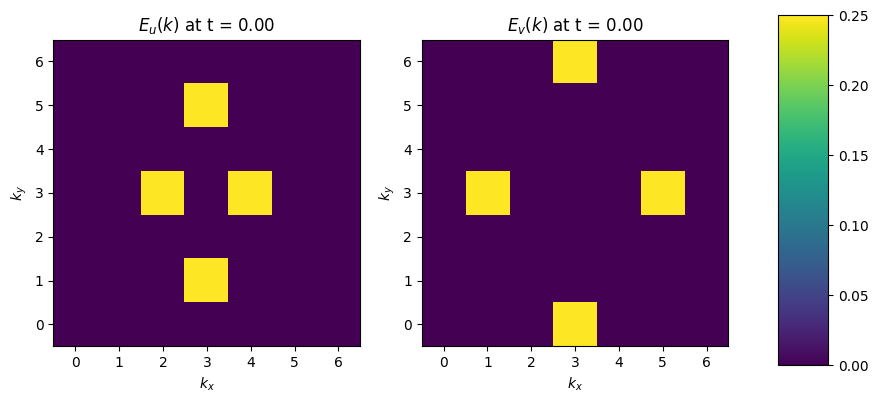

In [2]:
# eval_u = "sin(twopi*x) + sin(twopi*x)"
eval_u = "sin(twopi*x) + sin(2*twopi*y)"
eval_v = "sin(2*twopi*x) + cos(3*twopi*y)"
cf = [eval_u, eval_v]
# cf = None
dim = 2
nx = 7
es = EnergySpectrum.from_example(dim=dim, nx=nx, custom_formula=cf)
# es.plot_scalar_Ek(show=1, plot_type="stem")
es.plot_EK(show=1, shift_fft=0)

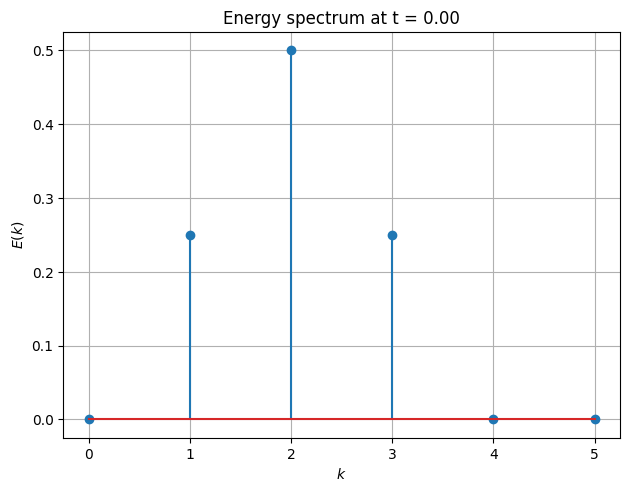

In [3]:
es.plot_scalar_Ek(show=1, plot_type="stem")
# es.plot_EK(show=1, shift_fft=0)


In [4]:
fname = "sin_velocity_profile_output/sin_velocity_profile_00000.hdf5"
esfile = EnergySpectrum.from_pysph_file(fname=fname, dim=2, L=1, nx_i=50)

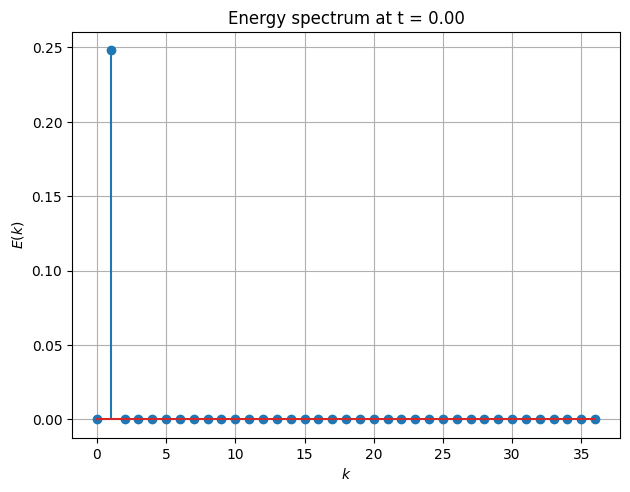

In [5]:
esfile.plot_scalar_Ek(show=1, plot_type="stem")